## Solving Rental Listing Inquiries

### *Problem Statement:* 
Predicting apartment rental listing popularity based on the listing content

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Reference for customizing plots : http://matplotlib.org/users/customizing.html
# print(plt.style.available)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Kaggle dataset: 
# https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data

### Loading the dataset provided
df_train = pd.read_json('../../random/data/rental_listing/train.json')
df_test = pd.read_json('../../random/data/rental_listing/test.json')

In [3]:
df_train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low


In [4]:
# Train
df_train["no_photos"] = df_train["photos"].apply(len)
df_train["no_features"] = df_train["features"].apply(len)
df_train["created_transformed"] = pd.to_datetime(df_train["created"])
df_train["created_yr"] = df_train["created_transformed"].dt.year
df_train["created_day"] = df_train["created_transformed"].dt.day
df_train["created_month"] = df_train["created_transformed"].dt.month
df_train['created_month_YrMnth'] = 100*df_train["created_yr"] + df_train["created_month"]

# Test
df_test["no_photos"] = df_test["photos"].apply(len)
df_test["no_features"] = df_test["features"].apply(len)
df_test["created_transformed"] = pd.to_datetime(df_test["created"])
df_test["created_yr"] = df_test["created_transformed"].dt.year
df_test["created_day"] = df_test["created_transformed"].dt.day
df_test["created_month"] = df_test["created_transformed"].dt.month
df_test['created_month_YrMnth'] = 100*df_test["created_yr"] + df_test["created_month"]

print("Number of rows in Train: {}".format(df_train.shape))
print("Number of rows in Test: {}".format(df_test.shape))

Number of rows in Train: (49352, 22)
Number of rows in Test: (74659, 21)


In [5]:
df_train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,price,street_address,interest_level,no_photos,no_features,created_transformed,created_yr,created_day,created_month,created_month_YrMnth
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,3000,792 Metropolitan Avenue,medium,5,0,2016-06-24 07:54:24,2016,24,6,201606
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,...,5465,808 Columbus Avenue,low,11,5,2016-06-12 12:19:27,2016,12,6,201606
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,...,2850,241 W 13 Street,high,8,4,2016-04-17 03:26:41,2016,17,4,201604
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,...,3275,333 East 49th Street,low,3,2,2016-04-18 02:22:02,2016,18,4,201604
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,...,3350,500 West 143rd Street,low,3,1,2016-04-28 01:32:41,2016,28,4,201604


In [6]:
df_train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level',
       'no_photos', 'no_features', 'created_transformed', 'created_yr',
       'created_day', 'created_month', 'created_month_YrMnth'],
      dtype='object')

In [7]:
print("Number of class types")
np.unique(df_train['interest_level'])

Number of class types


array(['high', 'low', 'medium'], dtype=object)

In [8]:
# Starting with numerical features first
features_considered = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 
                       'no_photos', 'no_features', 'created_yr', 'created_day', 'created_month', 
                       'created_month_YrMnth']

In [9]:
X = df_train[features_considered]
# Converting 'str' class labels to numeric labels
y = df_train['interest_level'].astype('category').cat.codes
print("Converted Labels: {}".format(np.unique(y)))

Converted Labels: [0 1 2]


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.30, random_state=42)

In [11]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=8, n_estimators=500, learning_rate=0.1, n_jobs=-1).fit(X_train, y_train)

In [12]:
y_hat_train = gbm.predict(X_train)
y_hat_val = gbm.predict(X_val)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Evaluation

In [13]:
from sklearn.metrics import classification_report

print("\n--------Train dataset classification report----------\n")
target_names = ['high', 'low', 'medium']
print(classification_report(y_train, y_hat_train, target_names=target_names))

print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val, target_names=target_names))


--------Train dataset classification report----------

             precision    recall  f1-score   support

       high       0.98      0.85      0.91      2687
        low       0.92      0.99      0.95     23999
     medium       0.93      0.76      0.84      7860

avg / total       0.93      0.92      0.92     34546


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

       high       0.49      0.26      0.34      1152
        low       0.79      0.90      0.84     10285
     medium       0.45      0.33      0.38      3369

avg / total       0.69      0.72      0.70     14806



## Using Skater to understand decision policies

In [14]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from skater.util.dataops import show_in_notebook
from skater.util.logger import _INFO


interpreter = Interpretation(X_train, feature_names=features_considered)
model_inst = InMemoryModel(gbm.predict, examples=X_train, model_type='classifier', unique_values=[0, 1, 2],
                           feature_names=features_considered, target_names=['0', '1', '2'], log_level=_INFO)

In [16]:
surrogate_explainer = interpreter.tree_surrogate(oracle=model_inst, class_weight="balanced", seed=5)
surrogate_explainer.fit(X_train, y_train, use_oracle=True, prune=None, scorer_type='default')

2018-09-08 17:58:34,871 - skater.core.global_interpretation.tree_surrogate - INFO - No pruning applied ...
2018-09-08 17:58:35,078 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (34546,)
2018-09-08 17:58:35,090 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 1.0; oracle score 0.922


-0.078

In [17]:
y_hat = surrogate_explainer.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_val, y_hat, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.32      0.26      0.29      1152
    class 1       0.78      0.84      0.81     10285
    class 2       0.38      0.31      0.34      3369

avg / total       0.65      0.68      0.66     14806



In [18]:
%matplotlib inline
surrogate_explainer.plot_global_decisions(colors=['lightsteelblue', 'darkkhaki', 'aquamarine'], 
                                          file_name='surrogate_tree_rental_no_prune.png', show_img=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0657449 to fit



2018-09-08 18:03:22,874 - skater.util.dataops - INFO - File Name: surrogate_tree_rental_no_prune.png


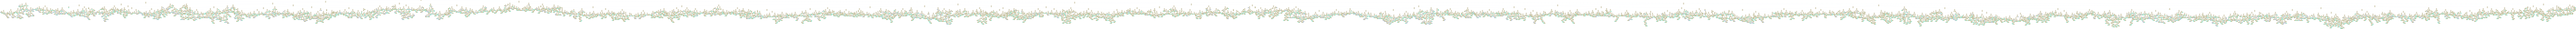

In [19]:
show_in_notebook('surrogate_tree_rental_no_prune.png', width=400, height=400)

In [20]:
# The interactiveness is not that impressive, more works needs to be done there. 
# This is just a temporary solution
show_in_notebook('surrogate_tree_rental_no_prune.png', width=900, height=400 , mode='interactive')

In [21]:
# params = {"criterion": ['gini', 'entropy'], "min_samples_leaf": [2, 4],
# "max_leaf_nodes": [2, 4, 6, 8, 10], "max_depth": [4, 6, 10, 14, 18]
# }

surrogate_explainer.fit(X_train, y_train, use_oracle=True, prune='pre', scorer_type='default')

2018-09-08 18:03:24,074 - skater.core.global_interpretation.tree_surrogate - INFO - pre pruning applied ...
2018-09-08 18:03:24,075 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used f1-score
2018-09-08 18:03:26,993 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (34546,)
2018-09-08 18:03:27,005 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.656; oracle score 0.922
2018-09-08 18:03:27,006 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 0.266 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score, lower is the fidelity/faithfulness of the surrogate model


0.266

In [22]:
surrogate_explainer.plot_global_decisions(colors=['lightsteelblue', 'darkkhaki', 'aquamarine'], 
                                          file_name='surrogate_tree_rental_pruned.png', show_img=False)

2018-09-08 18:03:27,156 - skater.util.dataops - INFO - File Name: surrogate_tree_rental_pruned.png


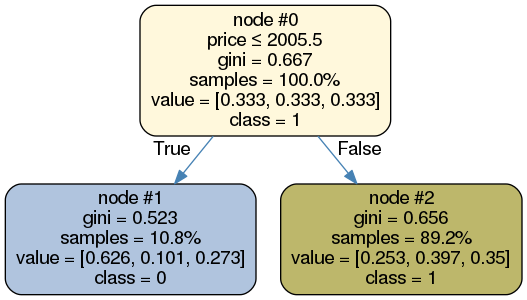

In [23]:
show_in_notebook('surrogate_tree_rental_pruned.png', width=400, height=400)

In [24]:
y_hat_val = surrogate_explainer.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.25      0.34      0.29      1152
    class 1       0.73      0.93      0.82     10285
    class 2       0.00      0.00      0.00      3369

avg / total       0.52      0.68      0.59     14806



In [25]:
surrogate_explainer2 = interpreter.tree_surrogate(oracle=model_inst, class_weight="balanced", seed=5)
surrogate_explainer2.fit(X_train, y_train, use_oracle=True, prune=None, scorer_type='default')

2018-09-08 18:03:28,129 - skater.core.global_interpretation.tree_surrogate - INFO - No pruning applied ...
2018-09-08 18:03:28,337 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (34546,)
2018-09-08 18:03:28,349 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 1.0; oracle score 0.922


-0.078

In [26]:
y_hat_val2 = surrogate_explainer2.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val2, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.32      0.26      0.29      1152
    class 1       0.78      0.84      0.81     10285
    class 2       0.38      0.31      0.34      3369

avg / total       0.65      0.68      0.66     14806



In [27]:
surrogate_explainer2.learn(X_train, y_train, use_oracle=True, prune='post', scorer_type='default')

AttributeError: 'TreeSurrogate' object has no attribute 'learn'

In [ ]:
# The way plotting is done now is slow and not that interactive, this needs to be improved
surrogate_explainer2.plot_global_decisions(colors=['lightsteelblue', 'darkkhaki', 'aquamarine'], 
                                          file_name='surrogate_tree_rental_postpruned.png', show_img=False)

In [ ]:
show_in_notebook('surrogate_tree_rental_postpruned.png', width=400, height=400)

In [ ]:
# Visualization for large graphs needs to be fixed, but in the meantime
surrogate_explainer2.decisions_as_txt()

In [ ]:
y_hat_val2 = surrogate_explainer2.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val2, target_names=target_names))

#### Changing the scoring function to 'log-loss'

In [ ]:
interpreter = Interpretation(X_train, feature_names=features_considered)
model_inst = InMemoryModel(gbm.predict_proba, examples=X_train, model_type='classifier',
                           feature_names=features_considered, target_names=['0', '1', '2'], log_level=_INFO)

In [ ]:
surrogate_explainer3 = interpreter.tree_surrogate(oracle=model_inst, class_weight="balanced", seed=5)
surrogate_explainer3.fit(X_train, y_train, use_oracle=True, prune='post', scorer_type='cross_entropy')

In [ ]:
y_hat_val3 = surrogate_explainer3.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val3, target_names=target_names))

#### Let's see how a hierarchical Interpretable Tree based model does?

In [ ]:
surrogate_explainer4 = interpreter.tree_surrogate(oracle=model_inst, class_weight="balanced", seed=5)
surrogate_explainer4.fit(X_train, y_train, use_oracle=False, prune='post', scorer_type='default')

In [ ]:
y_hat_val4 = surrogate_explainer4.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val4, target_names=target_names))

## Evaluating on supplied test dataset

In [ ]:
# using base estimator
X_test = df_test[features_considered]
y_hat_test_base_model = gbm.predict_proba(X_test)
assert X_test.shape[0] == y_hat_test_base_model.shape[0]

y_hat_test_surrogate = surrogate_explainer.predict(X_test, prob_score=True)
assert X_test.shape[0] == y_hat_test_surrogate.shape[0]

# post + F1 score
y_hat_test_surrogate_post_f1 = surrogate_explainer2.predict(X_test, prob_score=True)
assert X_test.shape[0] == y_hat_test_surrogate_post_f1.shape[0]

# post + log-loss
y_hat_test_surrogate_post_ll = surrogate_explainer3.predict(X_test, prob_score=True)
assert X_test.shape[0] == y_hat_test_surrogate_post_ll.shape[0]

# not trained on the predictions of the base model
y_hat_test_surrogate_i = surrogate_explainer4.predict(X_test, prob_score=True)
assert X_test.shape[0] == y_hat_test_surrogate_i.shape[0]

In [ ]:
## constructing the format needed for submission
list_id = df_test['listing_id'].tolist()
# base
predictions = pd.DataFrame(y_hat_test_base_model, columns=['high', 'low', 'medium'])
result_df_base = predictions
result_df_base.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_base.index)
# re-arrange the columns
result_df_base = result_df_base[['listing_id', 'high', 'low', 'medium']]

# Surrogate
predictions = pd.DataFrame(y_hat_test_surrogate, columns=['high', 'low', 'medium'])
result_df_surrogate = predictions
result_df_surrogate.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_surrogate.index)
# re-arrange the columns
result_df_surrogate = result_df_surrogate[['listing_id', 'high', 'low', 'medium']]

# post + F1 score
predictions = pd.DataFrame(y_hat_test_surrogate_post_f1, columns=['high', 'low', 'medium'])
result_df_surrogate_post_f1 = predictions
result_df_surrogate_post_f1.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_surrogate_post_f1.index)
# re-arrange the columns
result_df_surrogate_post_f1 = result_df_surrogate_post_f1[['listing_id', 'high', 'low', 'medium']]

# post + log-loss
predictions = pd.DataFrame(y_hat_test_surrogate_post_ll, columns=['high', 'low', 'medium'])
result_df_surrogate_post_ll = predictions
result_df_surrogate_post_ll.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_surrogate_post_ll.index)
# re-arrange the columns
result_df_surrogate_post_ll = result_df_surrogate_post_ll[['listing_id', 'high', 'low', 'medium']]


# a better interpretable tree using post-pruning
predictions = pd.DataFrame(y_hat_test_surrogate_i, columns=['high', 'low', 'medium'])
result_df_surrogate_i = predictions
result_df_surrogate_i.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_surrogate_i.index)
# re-arrange the columns
result_df_surrogate_i = result_df_surrogate_i[['listing_id', 'high', 'low', 'medium']]

In [ ]:
# converting to csv
result_df_base.to_csv('submission_base.csv', index=False)
# Using surrogate models for predicting didn't give good result but nevertheless could possibly be used
# for explaining the decisions approximately
result_df_surrogate.to_csv('submission_surrogate.csv', index=False)
result_df_surrogate_post_f1.to_csv('submission_post_f1.csv', index=False)
result_df_surrogate_post_ll.to_csv('submission_post_ll.csv', index=False)

# interpretable model without using predictions from the base model(Oracle) didn't help either in this case
result_df_surrogate_i.to_csv('submission_i.csv', index=False)